In [28]:
import hexp

import sys
import os
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import itertools
from matplotlib.lines import Line2D
from scipy import linalg
import qinfer
import scipy
import time

import lfig
sys.path.append("/home/bf16951/QMD")
import qmla

import expm

In [48]:
def get_chain_model(
    num_qubits, 
    base_terms=['x', 'y', 'z'], 
    transverse_terms=['x'],
    return_name=False
):
    connections = 'J'.join(list([str(i) for i in range(1, 1+num_qubits)]))
    model_terms = [
        'pauliLikewise_l{t}_{conn}_d{N}'.format(
            t = term, conn = connections, N=num_qubits
        ) for term in base_terms
    ]
    transverse_field = '_'.join([str(i) for i in range(1, 1+num_qubits)])
    transverse_terms = [
        'pauliLikewise_l{t}_{f}_d{N}'.format(
            t = transv, f = transverse_field, N=num_qubits
        ) for transv in transverse_terms
    ]
    model_terms.extend(transverse_terms)
    
    model_params = {
#         t : np.random.uniform(0, 1)
        t : 1
        for t in model_terms
    }
    
    model_name = '+'.join(model_terms)
    model_name = qmla.construct_models.alph(model_name
                                           )
    if return_name:
        return model_name
        
    hamiltonian = None
    for t in model_params: 
        if hamiltonian is None: 
            hamiltonian = model_params[t] * qmla.construct_models.compute(t)
        else:
            hamiltonian += model_params[t] * qmla.construct_models.compute(t)
    
    return hamiltonian

In [56]:
plus_probe_dict = qmla.shared_functionality.probe_set_generation.plus_probes_dict(
    max_num_qubits = 4, 
    num_probes = 1
)
random_probe_dict = qmla.shared_functionality.probe_set_generation.separable_probe_dict(
    max_num_qubits = 4, 
    num_probes = 1
)

In [71]:
heisenberg_model = get_chain_model(num_qubits, base_terms = ['x', 'y', 'z'], return_name = True)

In [72]:
heisenberg_model

'pauliLikewise_lx_1J2_d2+pauliLikewise_lx_1_2_d2+pauliLikewise_ly_1J2_d2+pauliLikewise_lz_1J2_d2'

In [67]:
num_qubits = 2
ising_model = get_chain_model(num_qubits, base_terms = ['z'], return_name = False)
heisenberg_model = get_chain_model(num_qubits, base_terms = ['x', 'y', 'z'], return_name = False)
plus_probe = plus_probe_dict[(0, num_qubits)]
random_probe = random_probe_dict[(0, num_qubits)]

In [68]:
time_list = np.arange(0, 5, 0.1)
ising_plus_ev = [
    qmla.shared_functionality.expectation_values.probability_from_default_expectation_value(
        ham = ising_model, 
        t = t, 
        state = plus_probe
    ) for t in time_list
]
ising_random_ev = [
    qmla.shared_functionality.expectation_values.probability_from_default_expectation_value(
        ham = ising_model, 
        t = t, 
        state = random_probe
    ) for t in time_list
]

heis_plus_ev = [
    qmla.shared_functionality.expectation_values.probability_from_default_expectation_value(
        ham = heisenberg_model, 
        t = t, 
        state = plus_probe
    ) for t in time_list
]
heis_random_ev = [
    qmla.shared_functionality.expectation_values.probability_from_default_expectation_value(
        ham = heisenberg_model, 
        t = t, 
        state = random_probe
    ) for t in time_list
]


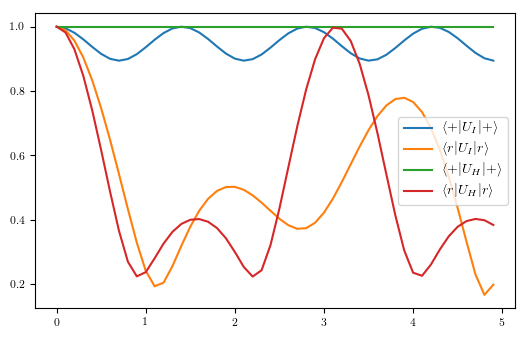

In [70]:
lf = lfig.LatexFigure()
ax = lf.new_axis()
ax.plot(
    time_list, 
    ising_plus_ev,
    label = r"$\langle + | U_I | + \rangle$"
)
ax.plot(
    time_list, 
    ising_random_ev,
    label = r"$\langle r | U_I | r \rangle$",
#     ls = ':'
)

ax.plot(
    time_list, 
    heis_plus_ev,
    label = r"$\langle + | U_H | + \rangle$"
)
ax.plot(
    time_list, 
    heis_random_ev,
    label = r"$\langle r | U_H | r \rangle$",
#     ls = '--'
)


ax.legend()